In [4]:
import numpy as np
import torchvision
import torch
from torch import nn

%matplotlib inline
import matplotlib.pyplot as plt

from pathlib import Path

import pickle
from sklearn.model_selection import train_test_split

In [6]:
s = soft_quant(n_soft_classes, sigma=2)

In [7]:
np.sum(s(0))

3.0066282746310002

(0.0, 1.05)

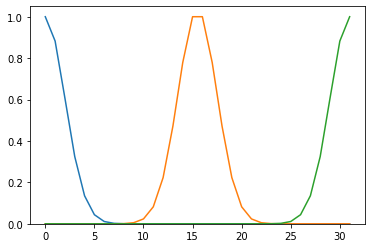

In [8]:
plt.plot(s(0))
plt.plot(s(0.5))
plt.plot(s(1))

plt.ylim(bottom=0)

In [9]:
def get_figsize(n_rows, n_cols):
    row_size = 8  # heigth
    column_size = 20  # width

    return (n_cols * column_size, n_rows * row_size)


def get_figa(n_rows, n_cols):
    fig, ax = plt.subplots(n_rows, n_cols, figsize=get_figsize(n_rows, n_cols))
    return fig, ax

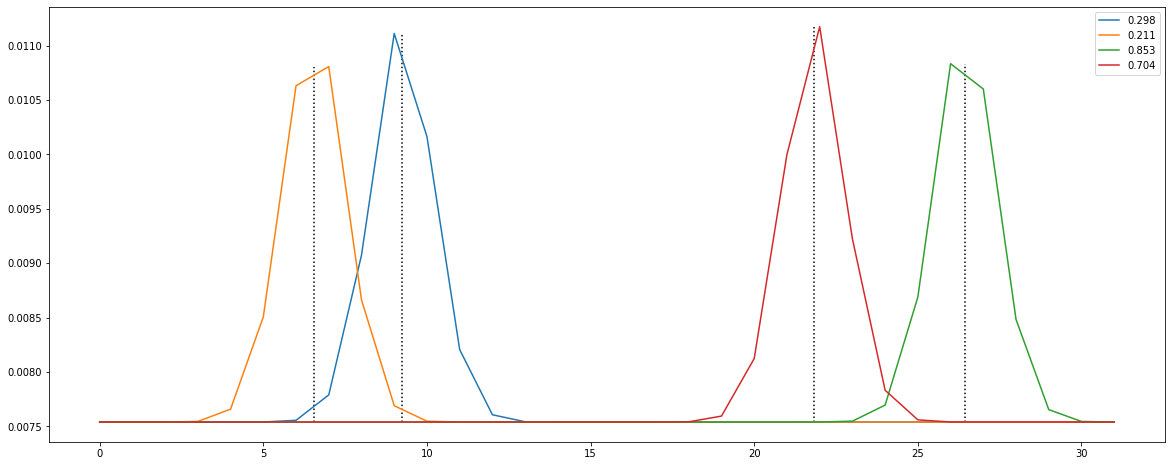

In [17]:
fig, axis = get_figa(1, 1)

n_soft_classes = 32


def normal(mu, sigma):
    def _f(x):
          return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))
    return _f

  
def soft_quant(classes=32, sigma=10, norm=lambda x: x/np.max(x)):
    def _f(x):
        vector = [
            normal(x * (classes - 1), sigma)(b)
            for b in range(classes)
        ]
        
        if norm:
            return norm(vector)
        
        return vector
    return _f
  

s = soft_quant(n_soft_classes, sigma=1, norm=softmax)
basis = list(range(n_soft_classes))

batch = np.random.uniform(0, 1, size=4)
representation = s(batch).T  # 4 x 256

for x, r in zip(batch, representation):    
    plt.plot(basis, r, label='{:.3f}'.format(x))
    plt.vlines(x=x * (n_soft_classes - 1), ymin=min(r), ymax=max(r), color='black', linestyle='dotted')
    
plt.legend()